In [154]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Matrix representing employees and their performance at each task
performance = np.array([
    [55, 30, 20, 20, 24, 24, 18, 33, 35, 29],
    [14, 14, 22, 34, 26, 19, 22, 29, 22, 19],
    [22, 16, 21, 27, 35, 25, 30, 22, 23, 23],
    [17, 25, 29, 26, 13, 24, 25, 25, 26, 18],
    [12, 25, 27, 26, 15, 24, 27, 25, 26, 14],
    [26, 29, 37, 34, 37, 20, 21, 25, 27, 27],
    [30, 28, 37, 28, 29, 23, 19, 33, 30, 21],
    [28, 21, 25, 24, 25, 20, 24, 24, 30, 24],
    [19, 18, 19, 28, 25, 27, 26, 32, 23, 22],
    [30, 22, 29, 19, 30, 29, 29, 21, 20, 28],
    [29, 25, 35, 29, 27, 28, 30, 28, 19, 33],
    [15, 19, 19, 33, 22, 24, 25, 31, 33, 21],
    [25, 35, 25, 32, 25, 22, 29, 22, 26, 31]
])

# Global parameters
POP_SIZE = 100
GENERATIONS = 100
MUTATION_RATE = 0.3
ELITISM_PERCENTAGE = 0.1

# Plot fitness history
def plot_fitness_history(fitness_history):
    """
    Plots the fitness history over generations

    Args:
        fitness_history (list): List of best fitness scores from each generation
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(fitness_history) + 1), fitness_history, marker='o', linestyle='-', linewidth=2)
    plt.title('Fitness History Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Validates if all the genes in the chromosome are unique values
def valid_chromosome(chromosome):
    """
    Verifies if all genes in the chromosome are unique.

    Args:
        chromosome (list): Chromosome.

    Returns:
        bool: True if all genes are unique, False otherwise.
    """
    return len(chromosome) == len(set(chromosome))

# Initialize population
def initialize_population(pop_size, num_tasks, num_employees):
    """
    Initializes the population with random chromosomes.

    Args:
        pop_size (int): Size of the population.
        num_tasks (int): Number of tasks.
        num_employees (int): Number of employees.

    Returns:
        population (list): A list of randomly generated chromosomes.
    """
    population = []
    for _ in range(pop_size):
        chromosome = random.sample(range(1, num_employees + 1), num_tasks)
        population.append(chromosome)
    return population

# Fitness function
def calculate_fitness(chromosome, performance):
    """
    Calculates the fitness score of a chromosome based on employee performance.

    Args:
        chromosome (list): Chromosome representing task assignments.
        performance (numpy array): Performance matrix of employees across tasks.

    Returns:
        fitness (int): Fitness score of the chromosome.
    """
    fitness = sum(performance[employee - 1, task_index] for task_index, employee in enumerate(chromosome))
    return fitness

# Tournament Selection with default value of k set to 3
def tournament_selection(population, fitness_scores, k=3):
    """
    Tournament selection. Selects k random chromsomes from population and of those,
    returns the chromsome with the best fitness score. 

    Args:
        population (list): List of chromosomes.
        fitness_scores (list): Fitness scores of the population.
        k (int, optional): Tournament size. Defaults to 3.

    Returns:
        list: Selected parent chromosome.
    """
    # select k random chromsomes from population
    selected_indices = random.sample(range(len(population)), k)
    best_index = max(selected_indices, key=lambda idx: fitness_scores[idx])
    return population[best_index]

# One-point crossover returning 2 children
def one_point_crossover(parent1, parent2):
    """
    Performs one-point crossover between two parent chromosomes.

    Args:
        parent1 (list): First parent chromosome.
        parent2 (list): Second parent chromosome.

    Returns:
        tuple: Two child chromosomes.
    """
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Swap mutation to rearrange existing genes within the chromosome
def swap_mutation(chromosome, mutation_rate):
    """
    If random number is within mutation rate, swaps the place of a random employee with another in the chromsome,
    otherwise returns unmutated chromosome.

    Args:
        chromsome (list): Chromsome to be mutated.
        mutation_rate (float): Rate at which to apply mutations to chromosomes.

    Returns:
        chromsome (list): Mutated or unmutated Chromsome.
    """
    if random.random() < mutation_rate:
        index1, index2 = random.sample(range(len(chromosome)), 2)
        # Swap gene at index 1 with gene at index 2
        chromosome[index1], chromosome[index2] = chromosome[index2], chromosome[index1]
    return chromosome

# Swap mutation to replace a random gene with an unused gene.
def unused_swap_mutation(chromosome, num_employees, mutation_rate):
    """
    if random number is within mutation rate, swaps a random employee with unassigned one in chromsome,
    otherwise returns unmutated chromosome.

    Args:
        chromsome (list): Chromsome to be mutated.
        num_employees (int): number of employees.
        mutation_rate (float): Rate at which to apply mutations to chromosomes.

    Returns:
        chromsome (list): Mutated or unmutated Chromsome.
    """
    if random.random() < mutation_rate:
        used_employees = set(chromosome)
        all_employees = set(range(1, num_employees + 1))
        unused_employees = list(all_employees - used_employees)

        if unused_employees:
            index = random.randint(0, len(chromosome) - 1)
            chromosome[index] = random.choice(unused_employees)
    return chromosome

# Main logic of the genetic algorithm
def genetic_algorithm(performance):
    """
    Runs the genetic algorithm to optimize task assignments based on performance.

    Args:
        performance (numpy array): performance matix of employees and tasks.

    Returns:
        tuple: Best chromosome and its fitness score.
    """
    num_tasks = performance.shape[1]
    num_employees = performance.shape[0]

    population = initialize_population(POP_SIZE, num_tasks, num_employees)
    fitness_history = []

    for generation in range(GENERATIONS):
        fitness_scores = [calculate_fitness(chromosome, performance) for chromosome in population]

        # Store best fitness score for plotting
        best_fitness = max(fitness_scores)
        fitness_history.append(best_fitness)

        # Sort population by fitness
        sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]

        # Elitism: Keep top percentage of population in new population
        elitism_count = max(1, int(ELITISM_PERCENTAGE * POP_SIZE))
        new_population = sorted_population[:elitism_count]

        # Create next generation
        while len(new_population) < POP_SIZE:
            parent1 = tournament_selection(population, fitness_scores)
            parent2 = tournament_selection(population, fitness_scores)

            child1, child2 = one_point_crossover(parent1, parent2)

            # Check the chromsomes are valid, if so add to the new population
            if valid_chromosome(child1):
                new_population.append(child1)
            if valid_chromosome(child2):
                new_population.append(child2)

        # Apply mutations
        for i in range(len(new_population)):
            new_population[i] = swap_mutation(new_population[i], MUTATION_RATE)
            new_population[i] = unused_swap_mutation(new_population[i], num_employees, MUTATION_RATE)

        # Update population
        population = new_population[:POP_SIZE]
        # Get new fitness scores
        fitness_scores = [calculate_fitness(chromosome, performance) for chromosome in population]
        best_index = fitness_scores.index(max(fitness_scores))
        print(f"Generation {generation+1}: Best Solution: {population[best_index]} | Fitness: {max(fitness_scores)}")

    # Plot fitness history
    plot_fitness_history(fitness_history)

    best_solution = population[best_index]
    best_score = max(fitness_scores)

    # Return best solution
    return best_solution, best_score

Generation 1: Best Solution: [1, 6, 7, 2, 3, 10, 9, 12, 11, 13] | Fitness: 326
Generation 2: Best Solution: [1, 6, 7, 2, 3, 10, 9, 13, 12, 11] | Fitness: 333
Generation 3: Best Solution: [1, 6, 7, 2, 3, 10, 9, 13, 12, 11] | Fitness: 333
Generation 4: Best Solution: [1, 6, 7, 2, 3, 10, 9, 5, 12, 11] | Fitness: 336
Generation 5: Best Solution: [1, 6, 7, 2, 3, 10, 9, 5, 12, 11] | Fitness: 336
Generation 6: Best Solution: [1, 6, 7, 2, 3, 10, 9, 5, 12, 11] | Fitness: 336
Generation 7: Best Solution: [1, 13, 7, 2, 3, 10, 9, 5, 12, 11] | Fitness: 342
Generation 8: Best Solution: [1, 13, 7, 2, 3, 10, 9, 5, 12, 11] | Fitness: 342
Generation 9: Best Solution: [1, 13, 7, 2, 3, 10, 9, 5, 12, 11] | Fitness: 342
Generation 10: Best Solution: [1, 13, 7, 2, 3, 10, 9, 5, 12, 11] | Fitness: 342
Generation 11: Best Solution: [1, 13, 7, 2, 3, 10, 11, 9, 12, 8] | Fitness: 344
Generation 12: Best Solution: [1, 13, 7, 6, 3, 10, 9, 2, 12, 11] | Fitness: 346
Generation 13: Best Solution: [1, 13, 7, 6, 3, 10, 9

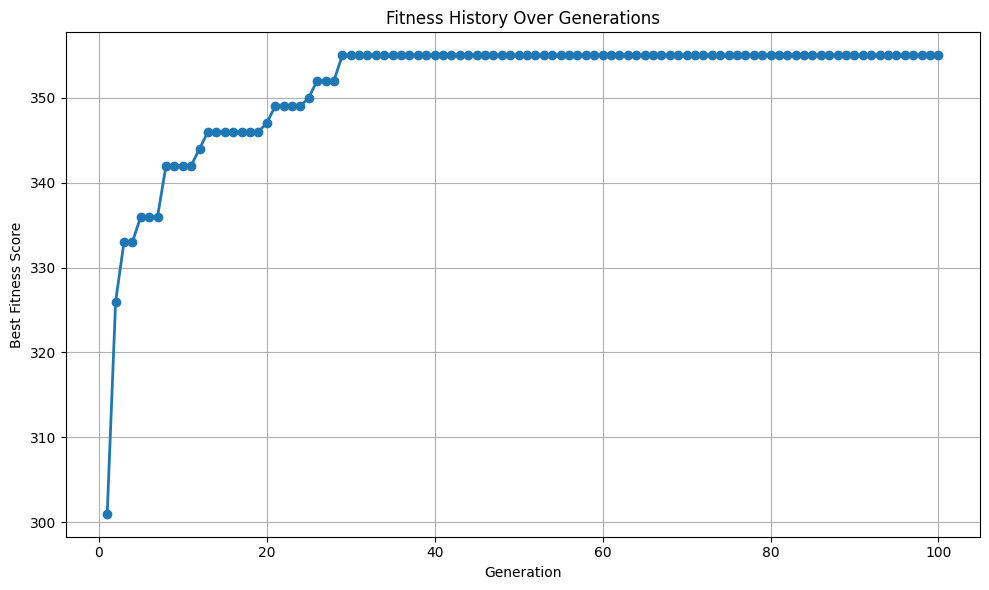

Best Solution: [1, 13, 7, 2, 6, 10, 3, 9, 12, 11] | Best Fitness: 355


In [155]:
best_solution, best_fitness = genetic_algorithm(performance)
print(f"Best Solution: {best_solution} | Best Fitness: {best_fitness}")

Best Solution: [1, 13, 7, 2, 6, 10, 3, 9, 12, 11]

Fitness: 355